In [1]:
import os
from pathlib import Path
if '_cwd' not in locals():
    _cwd = os.getcwd()
    os.chdir(Path(_cwd)/'..')
    os.chdir(Path(os.getcwd())/'..') # ew

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# add automatic reloading of modules
%load_ext autoreload
%autoreload 2

Loading data and model

In [5]:
import pandas as pd
import numpy as np

dataset = pd.read_parquet('data/aircraft/zurich_2019.parquet')
positions = dataset[['longitude', 'latitude']].values  # No need to wrap in np.array()
labels = dataset['label'].values

positions.shape, labels.shape

((180000, 2), (180000,))

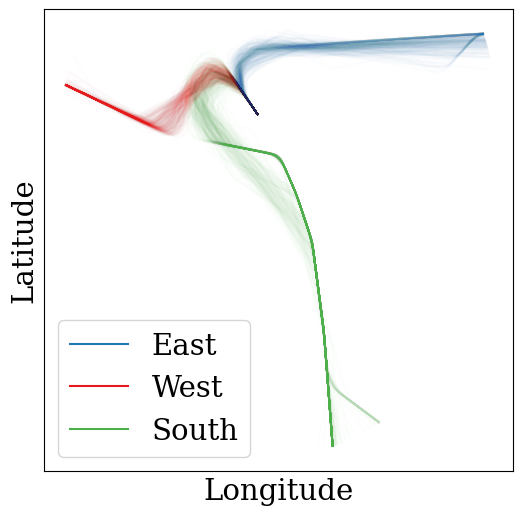

In [6]:
# Normalize data between -1 and 1
positions = (positions - positions.mean(axis=0)) / positions.std(axis=0)

# ✅ Reshape data: (num_flights, 200, 2)
num_flights = positions.shape[0] // 200  # Total number of flights
positions = positions.reshape(num_flights, 200, 2)
labels = labels[::200]  # One label per flight

fix = 10
# ✅ Matplotlib settings
plt.rcParams.update({
    "text.usetex": False,          # Disable LaTeX rendering
    "font.family": "serif",        # Use serif fonts
    "font.size": 11 + fix,               # Base font size
    "axes.titlesize": 12  + fix ,          # Titles slightly larger
    "axes.labelsize": 11  + fix,          # Axis labels size
    "xtick.labelsize": 11  + fix,         # Tick labels size
    "ytick.labelsize": 11  + fix,
    "legend.fontsize": 11  + fix ,
})

# ✅ Define color mapping
color_map = {
    'East': '#1f77b4',
    'West': '#e41a1c',
    'South': '#4daf4a',
}

# ✅ Plot flights correctly
plt.figure(figsize=(8, 6))  # Adjust figure size

for flight, label in zip(positions, labels):
    plt.plot(flight[:, 0], flight[:, 1], color=color_map.get(label, '#000000'), alpha=0.01)  # Increased alpha

# ✅ Add legend with unique labels
for label, color in color_map.items():
    plt.plot([], [], color=color, label=f"{label}")

# ✅ Remove all ticks
plt.xticks([])
plt.yticks([])

plt.gca().set_aspect('equal')  # Ensures equal aspect ratio

# ✅ Set axis labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend()
plt.show()

With Map

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx

# ✅ Load data
dataset = pd.read_parquet('data/aircraft/zurich_2019.parquet')
positions = dataset[['longitude', 'latitude']].values
labels = dataset['label'].values

# ✅ Reshape data: (num_flights, 200, 2)
num_flights = positions.shape[0] // 200  # Total number of flights
positions = positions.reshape(num_flights, 200, 2)
labels = labels[::200]  # One label per flight

fix = 10
# ✅ Matplotlib settings
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 11 + fix,
    "axes.titlesize": 12 + fix,
    "axes.labelsize": 11 + fix,
    "xtick.labelsize": 11 + fix,
    "ytick.labelsize": 11 + fix,
    "legend.fontsize": 11 + fix,
})

# ✅ Define color mapping
color_map = {
    'East': '#1f77b4',
    'West': '#e41a1c',
    'South': '#4daf4a',
}

# ✅ Plot flights
fig, ax = plt.subplots(figsize=(8, 6))

for flight, label in zip(positions, labels):
    ax.plot(flight[:, 0], flight[:, 1], color=color_map.get(label, '#000000'), alpha=0.01)

# ✅ Add legend
for label, color in color_map.items():
    ax.plot([], [], color=color, label=f"{label}")

# ✅ Set axis labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

ax.legend()

# ✅ Add base map
ctx.add_basemap(ax, crs="EPSG:4326")  # since your data is lon/lat

# ✅ Approximate aspect ratio correction
center_latitude = dataset['latitude'].mean()
ax.set_aspect(1 / np.cos(np.deg2rad(center_latitude)))  # realistic aspect for lon/lat

# ✅ Save figure
plt.show()


ModuleNotFoundError: No module named 'contextily'

In [ ]:
# read gradcam projections 
import numpy as np
heatmap = np.load('data/lszh/heatmaps.npy')
heatmap.shape

(3, 200, 200)

In [ ]:
# Do the mean over the first axis


/tmp/ipykernel_3998729/1247397232.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("YlOrRd").copy()


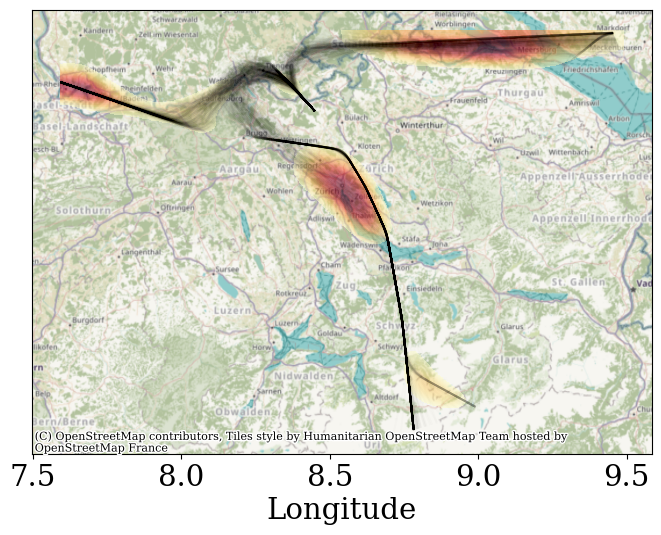

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx

# --- Load flight data ---
dataset = pd.read_parquet('data/aircraft/zurich_2019.parquet')
positions = dataset[['longitude', 'latitude']].values

# Reshape flight data: (num_flights, 200, 2)
num_flights = positions.shape[0] // 200
positions = positions.reshape(num_flights, 200, 2)

# --- Matplotlib settings ---
fix = 10
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 11 + fix,
    "axes.titlesize": 12 + fix,
    "axes.labelsize": 11 + fix,
    "xtick.labelsize": 11 + fix,
    "ytick.labelsize": 11 + fix,
    "legend.fontsize": 11 + fix,
})

# --- Create the plot ---
fig, ax = plt.subplots(figsize=(8, 6))

# Plot all flight trajectories in black
for flight in positions:
    ax.plot(flight[:, 0], flight[:, 1], color='black', alpha=0.01)

ax.set_xlabel("Longitude")

# --- Add basemap ---
ctx.add_basemap(ax, crs="EPSG:4326")

# --- Aspect ratio correction for lon/lat ---
center_latitude = dataset['latitude'].mean()
ax.set_aspect(1 / np.cos(np.deg2rad(center_latitude)))

# --- Determine the extent of the flight data for the heatmap ---
all_positions = positions.reshape(-1, 2)
x_min, x_max = all_positions[:, 0].min(), all_positions[:, 0].max()
y_min, y_max = all_positions[:, 1].min(), all_positions[:, 1].max()

# --- Load the precomputed heatmap ---
heatmap = np.load('data/lszh/heatmaps.npy')  # PC1 Releated heatmaps from gradcam_heatmap_normalized_per_label.ipynb
# shape (3, 200,200) (3 classes, 200x200 pixels)
heatmap = heatmap.mean(axis=0)

import matplotlib as mpl

# Make a copy of the "hot" colormap
cmap = mpl.cm.get_cmap("YlOrRd").copy()

# Make all values UNDER vmin fully transparent
cmap.set_under(color=(0, 0, 0, 0))  # RGBA, alpha=0 => transparent

# Now, when we call imshow, we set vmin to a small positive number:
vmin = np.percentile(heatmap, 90)  # 10th percentile
img = ax.imshow(
    heatmap.T,
    extent=[x_min, x_max, y_min, y_max],
    origin='lower',
    cmap=cmap,
    alpha=0.5,
    vmin=vmin,   # or whatever small threshold you want
    vmax=None    # or pick a max if you want
)

# remove y axis
ax.yaxis.set_visible(False)

# ✅ Approximate aspect ratio correction
center_latitude = dataset['latitude'].mean()
ax.set_aspect(1 / np.cos(np.deg2rad(center_latitude)))  # realistic aspect for lon/lat

plt.show()

In [ ]:
print("Flight positions range:")
print("x_min:", x_min, "x_max:", x_max)
print("y_min:", y_min, "y_max:", y_max)

print("Gradcam points range:")
print("x:", gradcam_points[:, 0].min(), gradcam_points[:, 0].max())
print("y:", gradcam_points[:, 1].min(), gradcam_points[:, 1].max())


Flight positions range:
x_min: 7.589932955228366 x_max: 9.489511343149037
y_min: 46.81158033467955 y_max: 47.73014831542969
Gradcam points range:
x: -0.0075353975 0.0010441522
y: -0.0172521 0.0023687566


One Trajectory

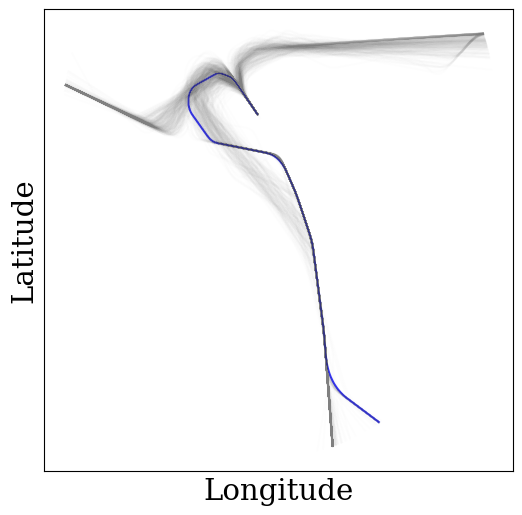

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Load data
dataset = pd.read_parquet('data/aircraft/zurich_2019.parquet')
positions = dataset[['longitude', 'latitude']].values
labels = dataset['label'].values

# ✅ Normalize data between -1 and 1
positions = (positions - positions.mean(axis=0)) / positions.std(axis=0)

# ✅ Reshape data: (num_flights, 200, 2)
num_flights = positions.shape[0] // 200  # Total number of flights
positions = positions.reshape(num_flights, 200, 2)
labels = labels[::200]  # One label per flight

fix = 10

# ✅ Matplotlib settings
plt.rcParams.update({
    "text.usetex": False,          
    "font.family": "serif",        
    "font.size": 11 + fix,               
    "axes.titlesize": 12 + fix,         
    "axes.labelsize": 11 + fix,         
    "xtick.labelsize": 11 + fix,        
    "ytick.labelsize": 11 + fix,
    "legend.fontsize": 11 + fix,
})

# ✅ Set index of the highlighted trajectory
highlight_index = 0   # Change this to highlight another trajectory

# ✅ Plot flights: all gray except one blue
plt.figure(figsize=(8, 6))

for i, flight in enumerate(positions):
    if i == highlight_index:
        plt.plot(flight[:, 0], flight[:, 1], color='blue', alpha=0.8, label='Highlighted Trajectory')
    else:
        plt.plot(flight[:, 0], flight[:, 1], color='gray', alpha=0.01)

# ✅ Plot settings
plt.xticks([])
plt.yticks([])
plt.gca().set_aspect('equal')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# ✅ Optional Legend
# plt.legend()

plt.show()
